In [1]:
#Lets first import all the nessessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [33]:
#Lets read the data in
df1=pd.read_csv ('C:\\Users\\Shrutee\\OneDrive - Microsoft\\Code\\MachineLearning\\Kenneth_CTAnalysis\\Data\\LT_Processed_without_Outliers.csv')

In [34]:
df1.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5.0,Azure,Compute,missing,False,False,Asia Pacific,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5.0,Azure,Storage,missing,False,False,Asia Pacific,Growth,20.0,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5.0,Azure,XIO Compute,missing,False,False,United States,Growth,20.0,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,True,missing,5.0,Azure,Compute,missing,False,False,Europe,Growth,20.0,800.0,99-ZZ No Priority,Azure Compute EMEA,North Europe,Not Restricted,Hero,0,PreRack,221.0,31.0


In [13]:
#As per the observations in EDA, we are going to drop-IsMainstream,ProjectCategory,NewRegionFlag, since it contains a single catogory
#df1.drop(["NewRegionFlag","IsMainstream","ProjectCategory"],axis=1,inplace=True)

In [35]:
#Since we already dealt with EDA and Feature Engineering, we will just check the summary
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [36]:
summary_table(df1)

Dataset Shape: (1070, 21)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,ColoReady At PlanReservationStart Flag,object,0,3
2,DeploymentSeverity,float64,0,4
3,EngineeringGroup,object,0,6
4,PlanResourceTypeName,object,0,31
5,IsAddRack,object,0,3
6,IsFirstFootprint,bool,0,2
7,IsNPI,bool,0,2
8,PlanGEO,object,0,14
9,PlanIntentName,object,0,7


In [37]:
df2=df1.copy()

In [8]:
df2.tail()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,SKU Avaliable Flag,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,EngineeringGroup_O365 Exchange,EngineeringGroup_Rare_var,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Xbox,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_HPC,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Rare_var,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Rare_var,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United States,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Rare_var,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test-Prod,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanOrderPriorityName_Rare_var,Region_Australia Southeast,Region_Canada Central,Region_Central US,Region_East Asia,Region_East US,Region_East US 2,Region_Japan East,Region_Japan West,Region_North Central US,Region_North Europe,Region_Rare_var,Region_South Central US,Region_Southeast Asia,Region_UK South,Region_UK West,Region_USGov Virginia,Region_West Central US,Region_West Europe,Region_West US,Region_West US 2,RegionGroup_Rare_var,RegionGroup_Restricted,RegionType_Hub,RegionType_Satellite,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_Rare_var,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG,SKUCategoryName_Rack,SKUCategoryName_Rare_var
1065,2.0,9.0,198.0,0,47.0,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1066,1.0,10.0,110.0,1,64.0,58.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1067,2.0,10.0,80.0,0,53.0,39.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1068,1.0,10.0,110.0,1,79.0,71.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [9]:
df2.head()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,SKU Avaliable Flag,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,EngineeringGroup_O365 Exchange,EngineeringGroup_Rare_var,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Xbox,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_HPC,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Rare_var,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Rare_var,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United States,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Rare_var,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test-Prod,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanOrderPriorityName_Rare_var,Region_Australia Southeast,Region_Canada Central,Region_Central US,Region_East Asia,Region_East US,Region_East US 2,Region_Japan East,Region_Japan West,Region_North Central US,Region_North Europe,Region_Rare_var,Region_South Central US,Region_Southeast Asia,Region_UK South,Region_UK West,Region_USGov Virginia,Region_West Central US,Region_West Europe,Region_West US,Region_West US 2,RegionGroup_Rare_var,RegionGroup_Restricted,RegionType_Hub,RegionType_Satellite,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_Rare_var,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG,SKUCategoryName_Rack,SKUCategoryName_Rare_var
0,0.0,20.0,800.0,0,124.0,31.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,20.0,280.0,0,126.0,42.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,20.0,800.0,0,198.0,31.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,20.0,880.0,0,207.0,49.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0

In [10]:
#lets define our predictors and outcome (Target)
x=df2.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df2["CT Signal to Dock"]

In [11]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

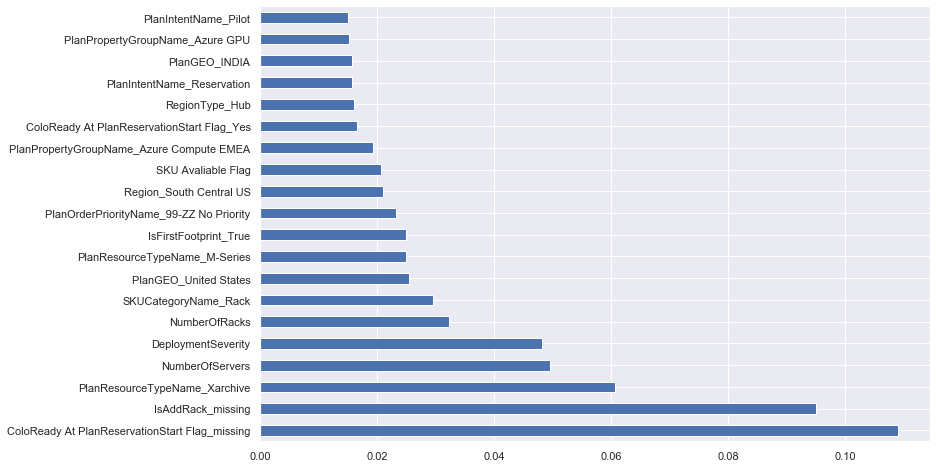

In [12]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [13]:
#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [14]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=300) #lets keep all the parmeters to default as of now

In [15]:
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
#Predictions 
pred=RFR.predict(x_test)

In [17]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [18]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [19]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 35.56690499804614
MAE: 23.210412087860316
r_square: 0.32130719536415087


In [20]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

for feature in zip (x.columns, importances):
    print (feature)

('DeploymentSeverity', 0.046826644787304236)
('NumberOfRacks', 0.03021981594344985)
('NumberOfServers', 0.1013326319964473)
('SKU Avaliable Flag', 0.034472629191712865)
('NewDCFlag_True', 0.005670328041883185)
('ColoReady At PlanReservationStart Flag_Yes', 0.013281319491449338)
('ColoReady At PlanReservationStart Flag_missing', 0.10345846623365396)
('EngineeringGroup_O365 Exchange', 0.002106901074693219)
('EngineeringGroup_Rare_var', 0.0016374399274166809)
('EngineeringGroup_SAP HANA', 0.0018371463987687303)
('EngineeringGroup_Search', 0.005234866994648005)
('EngineeringGroup_Xbox', 0.0028935862698947993)
('PlanResourceTypeName_BM CRAY GPU', 0.000222192628497762)
('PlanResourceTypeName_BM CRAY GPU OPS', 0.0002155648288580204)
('PlanResourceTypeName_BM HSM', 0.0025815242433920214)
('PlanResourceTypeName_BM NetApp', 0.004576003232312011)
('PlanResourceTypeName_BM VMWare Comp', 0.0001882905191175906)
('PlanResourceTypeName_BackEnd', 0.0011516450482330538)
('PlanResourceTypeName_Compute', 

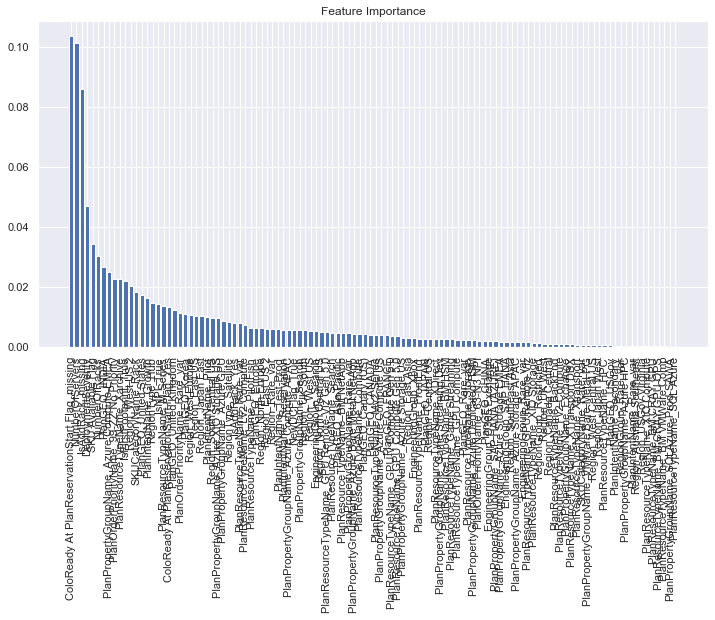

In [21]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [22]:
#Lets do hyperparameter tunning 
# We are going to use RandomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [24]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [25]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [26]:
#Fit the data
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [27]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [28]:
random_pred= rf_random.predict(x_test)

In [31]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, random_pred))
MAE = mean_absolute_error(y_test, random_pred)
r_squre= r2_score(y_test, random_pred)

In [32]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 35.6890815475396
MAE: 23.47734380011834
r_square: 0.3166364057261174


# Gradient Boosting

In [25]:
# Initialize and fit regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(loss='lad',max_depth=8,n_estimators=200)

In [26]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
#Predictions
pred=gbr.predict(x_test)

In [70]:
G_pred=pd.DataFrame(pred)#For stack model

In [28]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [29]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 57.77610548637707
MAE: 38.27808459062592
r_square: 0.4633895980639202


In [158]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = GradientBoostingRegressor()
parameters = {
                #'n_estimators': [100,200,300],
                'criterion' : ['mse','friedman_mse'],
                'max_depth' : [2,3,4,5,6,7,8,None],
                'loss' : ['ls', 'lad', 'huber']
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [159]:
cv.best_params_

{'criterion': 'friedman_mse', 'loss': 'lad', 'max_depth': 8}

In [75]:
#GridSearch Predictions 
pred=cv.predict(x_test)

In [76]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 60.192658730004176
MAE: 43.021765285373235
r_square: 0.39307409678391503


# AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor()

In [31]:
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [32]:
#Predictions
pred=abr.predict(x_test)

In [33]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [34]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 68.88035509656451
MAE: 55.37207955103475
r_square: 0.2373007598789828


In [82]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

adb1 = AdaBoostRegressor()
parameters = {
                'n_estimators': [100,200,300],
                'learning_rate' : [0.1,1],
                'loss' : ['linear', 'square', 'exponential']
               
}

cv = GridSearchCV(adb1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   19.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [83]:
cv.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

# Neural Neats-MLP

In [35]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()

In [36]:
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [37]:
#Predictions
pred=mlp.predict(x_test)

In [38]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [39]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 77.58378507091754
MAE: 62.61416986139014
r_square: 0.03238077988527943


In [89]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

mlp1 = MLPRegressor()
parameters = {
                'hidden_layer_sizes': [(10,), (50,), (100,)],
                'activation': ['relu', 'tanh', 'logistic'],
                'learning_rate': ['constant', 'invscaling', 'adaptive']
               
}

cv = GridSearchCV(mlp1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   30.2s finished
C:\Users\Shrutee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...uffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['rel

In [90]:
cv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'learning_rate': 'invscaling'}

# Catboost 

In [91]:
#lets define our predictors and outcome (Target)
#x1=df1.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
#y1=df1["CT Signal to LIve"]

In [92]:
#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=100)

In [40]:
from catboost import CatBoostRegressor
cr=CatBoostRegressor(iterations=200, loss_function='RMSE',
                              random_state = 2021, 
                              eval_metric="RMSE")

In [41]:
cr.fit(x_train, y_train,eval_set=(x_test, y_test))

Learning rate set to 0.120458
0:	learn: 70.4696472	test: 76.1668415	best: 76.1668415 (0)	total: 131ms	remaining: 26.1s
1:	learn: 67.9603518	test: 74.1713521	best: 74.1713521 (1)	total: 133ms	remaining: 13.1s
2:	learn: 66.1488325	test: 72.4206776	best: 72.4206776 (2)	total: 134ms	remaining: 8.82s
3:	learn: 64.5126527	test: 71.4011464	best: 71.4011464 (3)	total: 136ms	remaining: 6.66s
4:	learn: 63.0086006	test: 70.3311978	best: 70.3311978 (4)	total: 138ms	remaining: 5.37s
5:	learn: 61.5103668	test: 69.2836074	best: 69.2836074 (5)	total: 140ms	remaining: 4.52s
6:	learn: 60.3882033	test: 68.4667896	best: 68.4667896 (6)	total: 141ms	remaining: 3.9s
7:	learn: 59.4815768	test: 67.7746745	best: 67.7746745 (7)	total: 143ms	remaining: 3.42s
8:	learn: 58.4829935	test: 66.9142134	best: 66.9142134 (8)	total: 144ms	remaining: 3.06s
9:	learn: 57.7055938	test: 66.3990711	best: 66.3990711 (9)	total: 146ms	remaining: 2.77s
10:	learn: 56.8043077	test: 66.0224475	best: 66.0224475 (10)	total: 148ms	remaini

120:	learn: 35.1325739	test: 56.8768699	best: 56.8768699 (120)	total: 417ms	remaining: 272ms
121:	learn: 35.0515712	test: 56.8615329	best: 56.8615329 (121)	total: 419ms	remaining: 268ms
122:	learn: 34.8603030	test: 56.7290029	best: 56.7290029 (122)	total: 421ms	remaining: 263ms
123:	learn: 34.6993907	test: 56.7589416	best: 56.7290029 (122)	total: 422ms	remaining: 259ms
124:	learn: 34.6215773	test: 56.7620650	best: 56.7290029 (122)	total: 424ms	remaining: 255ms
125:	learn: 34.5855382	test: 56.7414699	best: 56.7290029 (122)	total: 426ms	remaining: 250ms
126:	learn: 34.5424562	test: 56.7550390	best: 56.7290029 (122)	total: 428ms	remaining: 246ms
127:	learn: 34.4554608	test: 56.7925644	best: 56.7290029 (122)	total: 431ms	remaining: 242ms
128:	learn: 34.3739062	test: 56.8121850	best: 56.7290029 (122)	total: 432ms	remaining: 238ms
129:	learn: 34.2818055	test: 56.8435755	best: 56.7290029 (122)	total: 434ms	remaining: 234ms
130:	learn: 34.1991207	test: 56.8895488	best: 56.7290029 (122)	total: 

In [42]:
# Lets do predictions on out test data
pred=cr.predict(x_test)

In [96]:
#C_pred=pd.DataFrame(pred)#For Stack model

In [43]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [44]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 55.66270234837938
MAE: 40.28072104180991
r_square: 0.5019291410759843


In [172]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

cat1 = CatBoostRegressor()
parameters = {
                'iterations': [100,200,300,400],
                'loss_function': ['MAE', 'RMSE'],
                
               
}

cv = GridSearchCV(cat1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   15.0s finished


Learning rate set to 0.127515
0:	learn: 70.5289572	total: 1.94ms	remaining: 386ms
1:	learn: 68.6293250	total: 4.2ms	remaining: 416ms
2:	learn: 66.6690580	total: 6.04ms	remaining: 397ms
3:	learn: 64.6257509	total: 8.88ms	remaining: 435ms
4:	learn: 62.8803320	total: 11.3ms	remaining: 441ms
5:	learn: 61.5255648	total: 13.9ms	remaining: 450ms
6:	learn: 60.4665590	total: 15.7ms	remaining: 433ms
7:	learn: 59.5194141	total: 17.7ms	remaining: 424ms
8:	learn: 58.5619383	total: 19.7ms	remaining: 419ms
9:	learn: 57.5774365	total: 23ms	remaining: 438ms
10:	learn: 57.0216006	total: 24.8ms	remaining: 426ms
11:	learn: 56.5459969	total: 26.7ms	remaining: 419ms
12:	learn: 55.9911613	total: 28.5ms	remaining: 410ms
13:	learn: 55.4575103	total: 30.4ms	remaining: 403ms
14:	learn: 54.7257195	total: 32ms	remaining: 395ms
15:	learn: 54.3228130	total: 33.7ms	remaining: 387ms
16:	learn: 54.0674625	total: 35.4ms	remaining: 381ms
17:	learn: 53.5898881	total: 37.2ms	remaining: 376ms
18:	learn: 53.0692108	total: 38

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x000000001389D4E0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'iterations': [100, 200, 300, 400],
                         'loss_function': ['MAE', 'RMSE']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [173]:
cv.best_params_

{'iterations': 200, 'loss_function': 'RMSE'}

# KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [46]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [47]:
pred=knn.predict(x_test)

In [48]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [49]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 63.00155529944681
MAE: 48.61716417910448
r_square: 0.36193473852298474


In [106]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

knn1 = KNeighborsRegressor()
parameters = {
                'n_neighbors': [5,7,10,12],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
                
               
}

cv = GridSearchCV(knn1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [107]:
cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}

# Stack Model 

Lest stack Two models 1. Gradient Boosting 2. CatBoosting 
And meta estimator- Random Forest 

This is a special method where we first segment the dataset as training and testing portions.Then we use the training set to train multiple regressors(base learners) and obtain their predictions made on the test set. Then we stack the predicted columns vertically which we consider as features while having the actual values of these samples in the last column as targets.Now we have created a new dataset which we give to another Regressor(meta learner) to identify patterns/relationships between predictions and actual values.

# Now Lets concat the 2 prediction datafreames and one Actual data frame
actual=pd.DataFrame(y_test)

actual.to_csv("True.csv",index=0,columns=actual.columns)

G_pred.columns=["Prediction1"]
C_pred.columns=["Prediction2"]

sd=pd.read_csv("priction_join.csv")

sd.info()

#Lets define X and Y
x=sd.drop("CT Signal to LIve",axis=1)
y=sd["CT Signal to LIve"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

stacker= RandomForestRegressor(n_estimators=100,max_depth=5)

stacker.fit(x_train,y_train)

stcker_pred=stacker.predict(x_test)

#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, stcker_pred))
MAE = mean_absolute_error(y_test, stcker_pred)
r_squre= r2_score(y_test, stcker_pred)

#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7,8,None]
}

cv = GridSearchCV(rf, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

cv.best_params_